<a href="https://colab.research.google.com/github/vishnuiyer23ug-stack/computational-statistics-course-4/blob/main/Class_05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnuiy","key":"486d6432bba091fa3d92dbda2f2ebdd4"}'}

In [5]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager

In [7]:
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
  0% 0.00/48.5k [00:00<?, ?B/s]
100% 48.5k/48.5k [00:00<00:00, 136MB/s]


In [8]:
!unzip student-performance-multiple-linear-regression.zip

Archive:  student-performance-multiple-linear-regression.zip
  inflating: Student_Performance.csv  


In [9]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [10]:
os.listdir() # Look for the files/directories within the current directory

['.config',
 'Student_Performance.csv',
 'kaggle_legacy_api_key.json',
 'kaggle.json',
 'student-performance-multiple-linear-regression.zip',
 'sample_data']

The Student_Performance.csv is available!

In [14]:
data = pd.read_csv("Student_Performance.csv") # Read the csv file into a pandas dataframe
print(type(data)) # This shows us that we are dealing with a dataframe. Think of a dataframe like a table.
data.head() # This shows us the first five rows. Peformance index is actually what we are trying to predict, so we have 5 features.

<class 'pandas.core.frame.DataFrame'>


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [15]:
data.info() # Gives basic information about the dataframe. Gives info about each variable in the dataset

# Extracurricular activities are considered an object even though they are technically yes and no strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [17]:
data.shape # Gives us the number of rows and the number of columns in that order

(10000, 6)

In [18]:
data.describe() # Gives basic statistics about the columns of the dataframe

# Any column that is not int or float cannot be described using the statistics here.
# We would need to assign a dummy variable for the extracurricular activities where yes = 1 and no = 0

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [20]:
encoder = LabelEncoder() # This is where we make the dummy variable

# The LabelEncoder automatically converts yes to 1 and no to 0. It is part of a package loaded above, but this conversion can be done
# with a function as well.

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

data.describe() # Now extracurricular activities shows up

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [37]:
data.iloc[2:5] # iloc is index locator and this works exactly like indexing in an array does. The outer limit is excluded
# Also, it always calls the rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [38]:
data["Hours Studied"].mean() # This is how we can quickly find sample statistics within the data frame.

np.float64(4.9929)

In [28]:
X = data.drop(columns = "Performance Index") # X has every column except Performance Index
y = data["Performance Index"] # y has only the Performance Index
# The reason that we are doing this is to separate the features from the labels. We want to separate the predictors and the response
# X has the features, and y is the response variable

X.head()
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [39]:
X.sample(5) # Gives us a random sample of 5 (without replacement and not ordered)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9463,1,51,0,9,0
7745,4,98,1,4,6
6956,3,71,1,5,9
144,8,48,0,5,4
1192,1,60,1,4,3


In [33]:
y.sample(5)

,Performance Index
9241,41.0
4241,55.0
9919,74.0
9528,78.0
524,34.0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # The train test split also comes from a package above

# Try creating the training and testing data without the function also. Part of the data has to be excluded from X, and the corresponding
# y values also have to be separated out. Random state is the same as a random seed, and test size shows us what portion of the total data
# will be set aside for the training data.
# Usually people take a 80-20 split or a 70-30 split between training and testing data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [35]:
model = LinearRegression() # We have created a variable called model which will carry out a Linear Regression
model.fit(X_train,y_train) # Carries out the regression on our training data variables

LinearRegression()

In [42]:
model.score(X_train, y_train) # This returns the R^2.

0.9886898790682355

In [44]:
predict = np.round(model.predict(X_test), decimals = 1) # This gives us the y-values that we can predict using our regression model

In [45]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


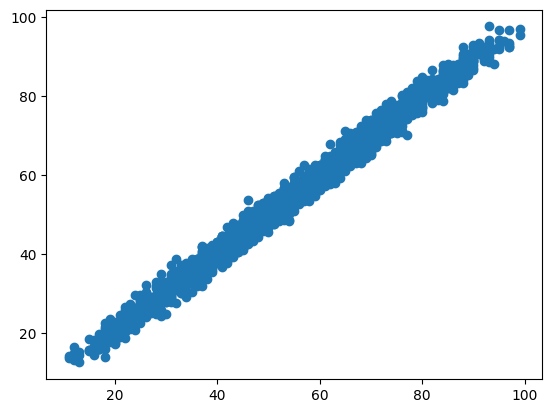

In [46]:
plt.scatter(y_test, predict) # This is largely a 45 degree line, so we can say that the predicted y is almost equal to the observed y.
# This is also why the R^2 is so high.
plt.show()

In [47]:
r2_score(y_test,predict) # This is the R^2 on the test dataset and it is still quite high, so we have a solid model.

0.9889704960519785

In [48]:
model.coef_, model.intercept_ # The coefficients are ordered according to the order of the columns
# Strongest association with the hours studied, and weakest association with the question papers practiced.

(array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144]),
 np.float64(-33.92194621555638))

## Try performing simple linear regression on each of these features indvidually

In [49]:
X_single_feature = data.drop(columns=["Sleep Hours", "Previous Scores", "Extracurricular Activities",	"Sample Question Papers Practiced", "Performance Index"])
# We are dropping every factor except Hours Studied
y = data["Performance Index"]
X_single_feature

,Hours Studied
0,7
1,4
2,8
3,5
4,7
...,...
9995,1
9996,7
9997,6
9998,9


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 1) (8000,) (2000, 1) (2000,)


In [51]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
model.score(X_train, y_train) # Much worse R^2 than before which makes sense with the single factor

0.14156806239865583

In [53]:
predict = np.round(model.predict(X_test), decimals = 1)

In [54]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,55.4
4684,20.0,47.0
1731,46.0,60.9
4742,28.0,58.1
4521,41.0,60.9
...,...,...
6412,45.0,47.0
8285,66.0,52.6
7853,16.0,47.0
1095,65.0,49.8


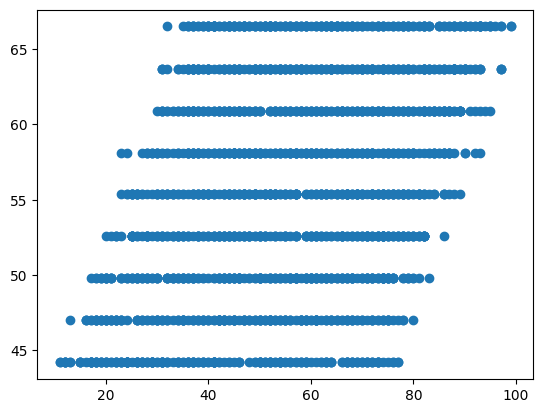

In [55]:
plt.scatter(y_test, predict)
plt.show() # The plot is not at all close to the 45 degree line

In [56]:
r2_score(y_test,predict)

0.1316794277296338

In [57]:
model.coef_, model.intercept_ # The previous coefficient was 2.85 and here we have 2.78. This establishes the difference between MLR and SLR
# The issue arises because the features are not independent of each other. So, if we only consider one feature, the effects of the other
# features also affects them here. In an MLR setup, we control for the values of the other features, and find the effects of each feature
# independent of each other.

(array([2.78430044]), np.float64(41.436634826535744))

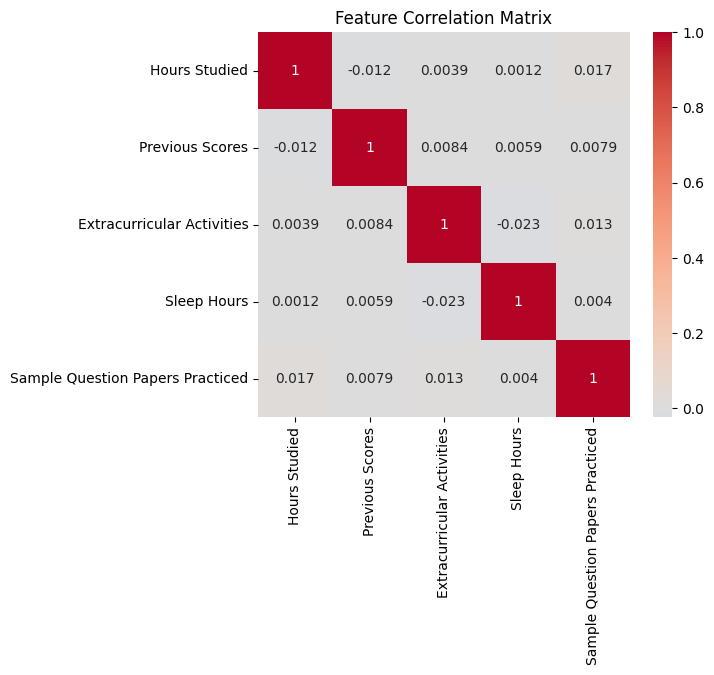

In [58]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show() # We observe that there is currently not much correlation between features, which is why our estimates across MLR and SLR
# are almost equal.

Let's try adding some correlation between Hours Studied and Question Papers Practiced

In [59]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [60]:
X["Hours Studied Correlated"] = round(X["Hours Studied"] - 0.1*X["Previous Scores"] + 0.1 * np.random.randn(len(X)))
# We are trying to show that the people with higher scores before, study fewer hours. This brings up a correlation and thus necessitates
# MLR
X["Hours Studied Correlated"] = X["Hours Studied Correlated"].clip(lower=0)
X = X.drop(columns=["Hours Studied"])
X

,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Hours Studied Correlated
0,99,1,9,1,0.0
1,82,0,4,2,0.0
2,51,1,7,2,3.0
3,52,1,5,2,-0.0
4,75,0,8,5,-0.0
...,...,...,...,...,...
9995,49,1,4,2,0.0
9996,64,1,8,5,1.0
9997,83,1,8,5,0.0
9998,97,1,7,0,0.0


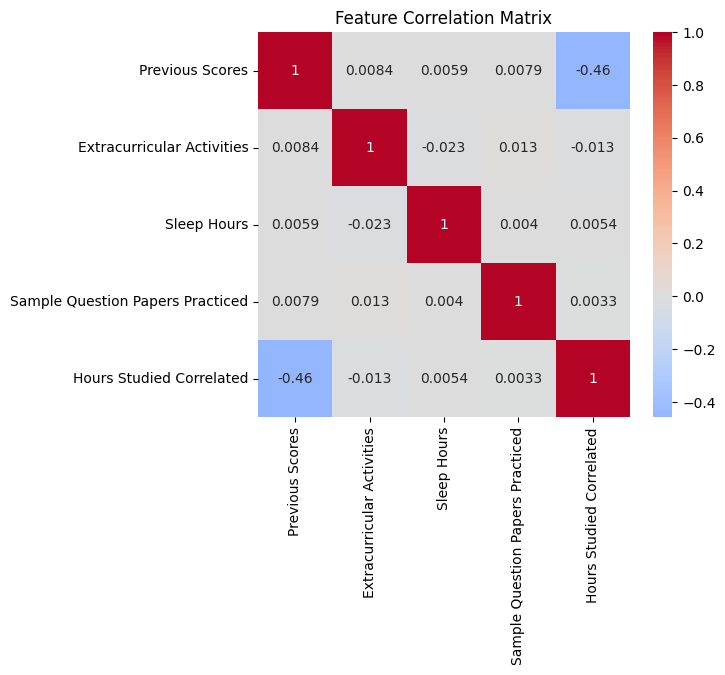

In [61]:
corr = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()
# The new correlation plot shows the correlation between study hours and previous scores

In [62]:
# MLR with the correlated data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train, y_train) # Our R^2 on the training data is 0.89

0.8991646035405512

In [63]:
predict = np.round(model.predict(X_test), decimals = 1)
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,52.0
4684,20.0,25.7
1731,46.0,42.7
4742,28.0,31.8
4521,41.0,42.0
...,...,...
6412,45.0,52.9
8285,66.0,64.2
7853,16.0,18.9
1095,65.0,68.2


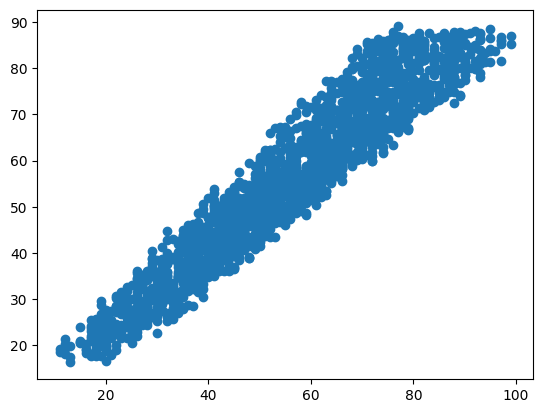

In [64]:
plt.scatter(y_test, predict)
plt.show()

In [65]:
r2_score(y_test,predict)

0.9076640735889674

In [66]:
model.coef_, model.intercept_ # Here our Hours Studied coefficient is 4.71

(array([1.14979336, 0.75887528, 0.46875894, 0.20925549, 4.71321462]),
 np.float64(-31.518229696341173))

In [67]:
# Now doing it with SLR

X_single_feature_correlated = data.drop(columns=["Sleep Hours", "Previous Scores", "Extracurricular Activities",	"Sample Question Papers Practiced", "Performance Index"])
# We are dropping every factor except Hours Studied Correlated
y = data["Performance Index"]
X_single_feature_correlated

,Hours Studied
0,7
1,4
2,8
3,5
4,7
...,...
9995,1
9996,7
9997,6
9998,9


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_single_feature_correlated, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 1) (8000,) (2000, 1) (2000,)


In [69]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [71]:
model.score(X_train, y_train) # Much lower R^2

0.14156806239865583

In [72]:
predict = np.round(model.predict(X_test), decimals = 1)
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,55.4
4684,20.0,47.0
1731,46.0,60.9
4742,28.0,58.1
4521,41.0,60.9
...,...,...
6412,45.0,47.0
8285,66.0,52.6
7853,16.0,47.0
1095,65.0,49.8


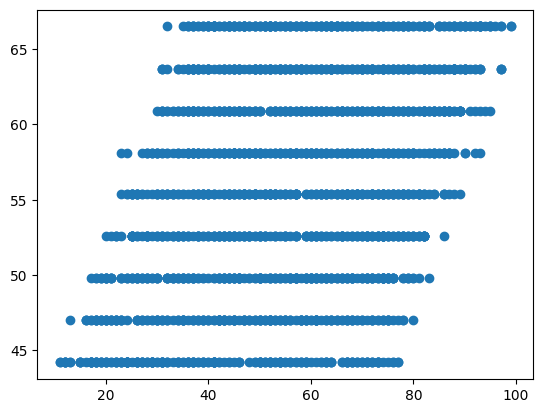

In [73]:
plt.scatter(y_test, predict)
plt.show() # The plot is not at all close to the 45 degree line

In [74]:
r2_score(y_test,predict)

0.1316794277296338

In [75]:
model.coef_, model.intercept_ # Now, our coefficient is much smaller, because its negative correlation with the previous scores
# is not being controlled for.

(array([2.78430044]), np.float64(41.436634826535744))